In [22]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [6]:
import pandas as pd
cardio = pd.read_csv('../Data/01-modified-data/cardio.csv')
cardio['bmi'] = round(cardio['weight'] / ((cardio['height']/100) ** 2),2)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62,110,80,1,1,0,0,1,0,21.97
1,1,55,1,156,85,140,90,3,1,0,0,1,1,34.93
2,2,52,1,165,64,130,70,3,1,0,0,0,1,23.51
3,3,48,2,169,82,150,100,1,1,0,0,1,1,28.71
4,4,48,1,156,56,100,60,1,1,0,0,0,0,23.01


In [2]:
# LOOK AT FIRST ROW/Dataframe
print(cardio.iloc[0])

id               0.00
age             50.00
gender           2.00
height         168.00
weight          62.00
ap_hi          110.00
ap_lo           80.00
cholesterol      1.00
gluc             1.00
smoke            0.00
alco             0.00
active           1.00
cardio           0.00
bmi             21.97
Name: 0, dtype: float64


In [3]:
#PRINT THE FOLLOWING DATA-FRAME WHICH SUMMARIZES EACH COLUMN
summary_cardio = cardio.describe().T[['min', 'mean', 'max']]
summary_cardio['dtypes'] = cardio.dtypes
summary_cardio = summary_cardio[['dtypes', 'min', 'mean', 'max']]
summary_cardio

,dtypes,min,mean,max
id,int64,0.00,49947.926488,99999.00
age,int64,30.00,53.278878,65.00
gender,int64,1.00,1.348317,2.00
height,int64,142.00,164.452952,187.00
weight,int64,37.00,72.708283,109.00
ap_hi,int64,85.00,125.447212,170.00
ap_lo,int64,55.00,80.773617,106.00
cholesterol,int64,1.00,1.349921,3.00
gluc,int64,1.00,1.217434,3.00
smoke,int64,0.00,0.086967,1.00


In [5]:
# INSERT CODE TO EXPLORE THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH CARDIO (THEN PRINT THE RESULT)
count0 = len(cardio[cardio['cardio'] == 0])
count1 = len(cardio[cardio['cardio'] == 1])
total = count0  + count1  
prop1 = count0  / total
prop2 = count1 / total

print("Number of points with cardio=0:", count0, prop1)
print("Number of points with cardio=1:", count1, prop2)

Number of points with cardio=0: 33577 0.5181156065796377
Number of points with cardio=1: 31229 0.4818843934203623


(14, 14)


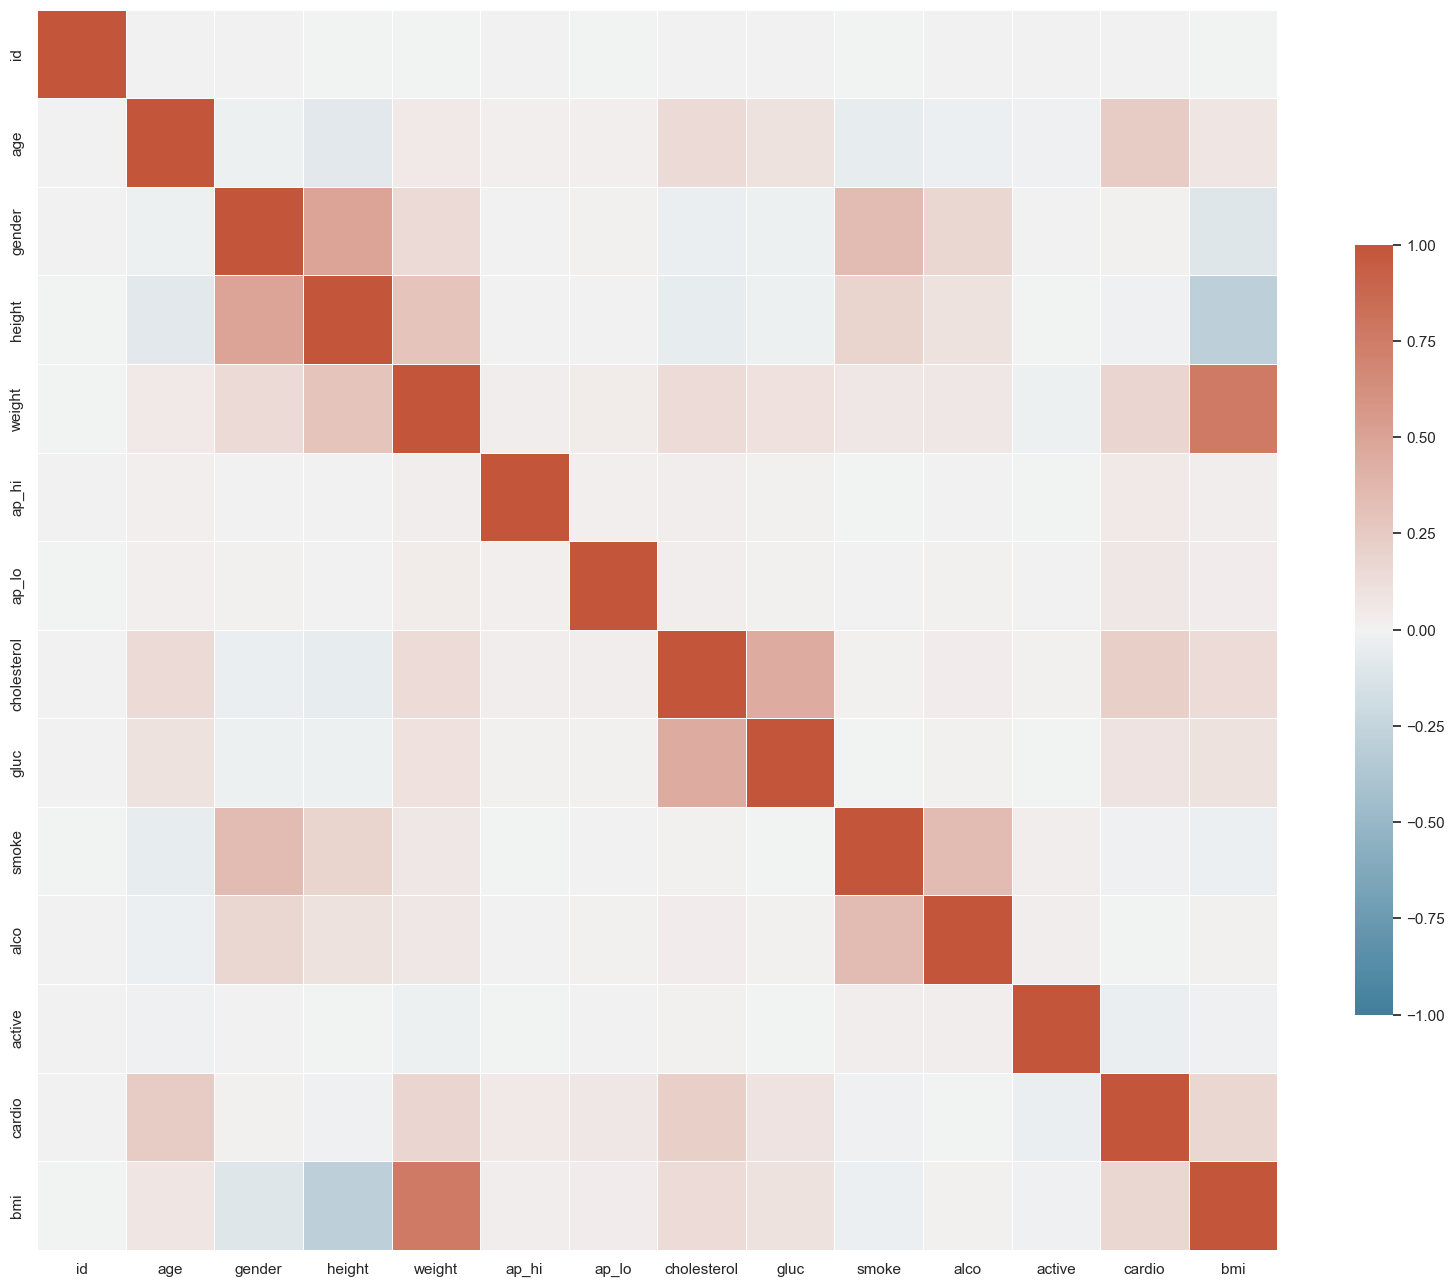

In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt
# RUN THE FOLLOWING CODE TO SHOW THE HEAT-MAP FOR THE CORRELATION MATRIX
corr = cardio.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

In [28]:
# INSERT CODE TO MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="target" COLUMN and X="everything else"
X = cardio.drop('cardio', axis=1) 
Y = cardio['cardio']

In [29]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [33]:
#Baseline Random Classifier
import numpy as np
import random
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
# RANDOM CLASSIFIER 

np.random.seed(12)

def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))

print("\nBINARY CLASS: UNIFORM LOAD")
y=Y
random_classifier(y)

print("\nBINARY CLASS: NON UNIFORM LOAD")
y=Y
random_classifier(y)



BINARY CLASS: UNIFORM LOAD
-----RANDOM CLASSIFIER-----
count of prediction: dict_values([35071, 34929])
probability of prediction: [0.50101429 0.49898571]
accuracy 0.4986
percision, recall, fscore, (array([0.49890223, 0.49829654]), array([0.49961452, 0.49758426]), array([0.49925812, 0.49794015]), array([35021, 34979]))

BINARY CLASS: NON UNIFORM LOAD
-----RANDOM CLASSIFIER-----
count of prediction: dict_values([35055, 34945])
probability of prediction: [0.50078571 0.49921429]
accuracy 0.5006857142857143
percision, recall, fscore, (array([0.50098727, 0.50038511]), array([0.49990006, 0.50147231]), array([0.50044307, 0.50092812]), array([35021, 34979]))


In [34]:

#### INSERT CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train,y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),precision_score(y_test, yp_test,pos_label=1),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),precision_score(y_train, yp_train,pos_label=1),recall_score(y_train, yp_train,pos_label=1)])



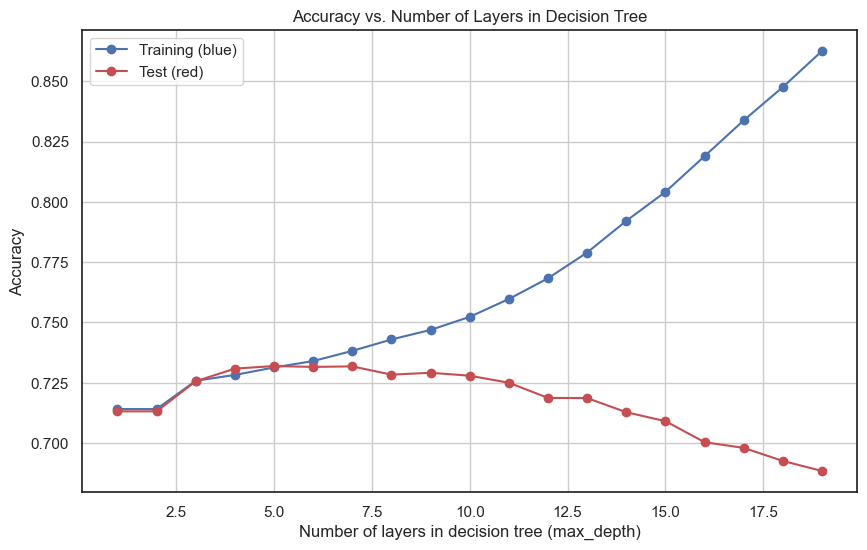

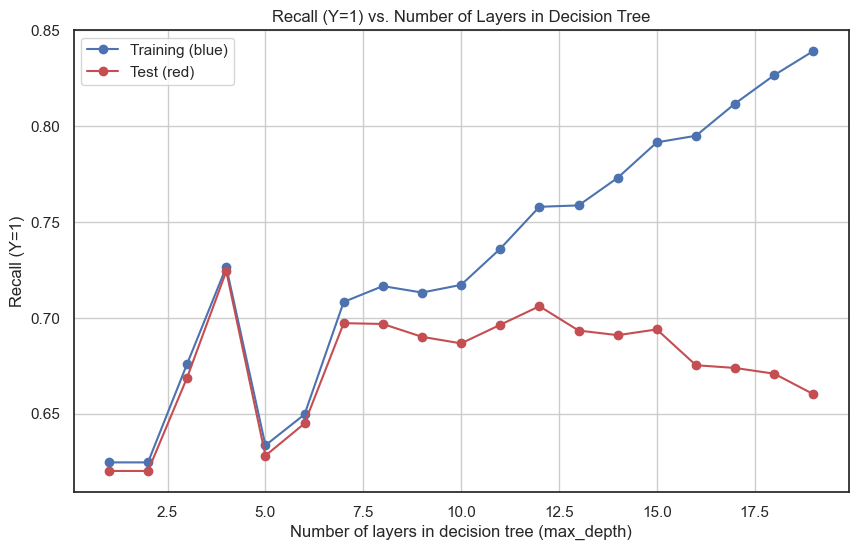

In [35]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)

# NOTE: THERE IS A TYPO IN THE THIRD PLOT, IT SHOULD BE RECALL IN THE Y-AXIS LABEL NOT ACCURACY

test_results_np = np.array(test_results)
train_results_np = np.array(train_results)

# Plot the accuracy for training and test sets
plt.figure(figsize=(10, 6))
plt.plot(train_results_np[:, 0], train_results_np[:, 1], 'bo-', label='Training (blue)')
plt.plot(test_results_np[:, 0], test_results_np[:, 1], 'ro-', label='Test (red)')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Layers in Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


# Plot the recall for Y=1 for training and test sets
plt.figure(figsize=(10, 6))
plt.plot(train_results_np[:, 0], train_results_np[:, 3], 'bo-', label='Training (blue)')
plt.plot(test_results_np[:, 0], test_results_np[:, 3], 'ro-', label='Test (red)')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Recall (Y=1)')
plt.title('Recall (Y=1) vs. Number of Layers in Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
best_tree = tree.DecisionTreeClassifier(max_depth=4)
best_tree = best_tree.fit(x_train,y_train)

yp_train=best_tree.predict(x_train)
yp_test=best_tree.predict(x_test)

In [37]:
	
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score

def confusion_plot(y_data, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_data, y_pred)
    
    accuracy = accuracy_score(y_data, y_pred)
    negative_recall = recall_score(y_data, y_pred, pos_label=0)
    negative_precision = precision_score(y_data, y_pred, pos_label=0)
    positive_recall = recall_score(y_data, y_pred, pos_label=1)
    positive_precision = precision_score(y_data, y_pred, pos_label=1)
    
    # Print metrics
    print(f'ACCURACY: {accuracy}')
    print(f'NEGATIVE RECALL (Y=0): {negative_recall}')
    print(f'NEGATIVE PRECISION (Y=0): {negative_precision}')
    print(f'POSITIVE RECALL (Y=1): {positive_recall}')
    print(f'POSITIVE PRECISION (Y=1): {positive_precision}')
    print(cm)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [38]:
import graphviz
def plot_tree(model,X,Y):
    model_fitted = model.fit(X,Y)
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model_fitted, 
                   feature_names=X.columns.tolist(),  
                   class_names=['0','1'],
                   filled=True)

------TRAINING------
ACCURACY: 0.72825
NEGATIVE RECALL (Y=0): 0.7299871575342466
NEGATIVE PRECISION (Y=0): 0.7279097894137735
POSITIVE RECALL (Y=1): 0.7265088672768879
POSITIVE PRECISION (Y=1): 0.7285929432013769
[[20463  7569]
 [ 7649 20319]]


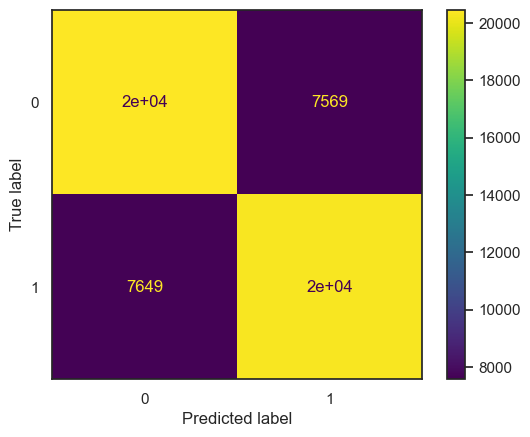

------TEST------
ACCURACY: 0.7308571428571429
NEGATIVE RECALL (Y=0): 0.7374445557304335
NEGATIVE PRECISION (Y=0): 0.7272470721038521
POSITIVE RECALL (Y=1): 0.7242904007987448
POSITIVE PRECISION (Y=1): 0.7345580789816288
[[5154 1835]
 [1933 5078]]


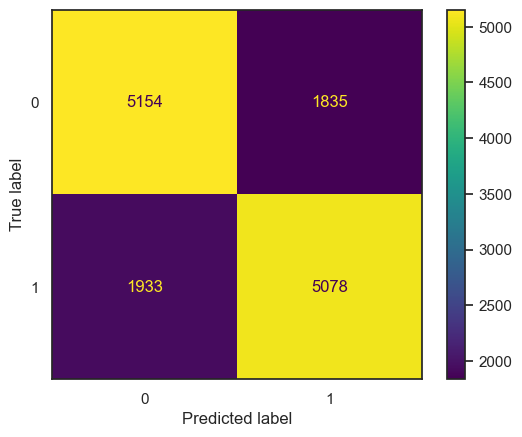

In [39]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)



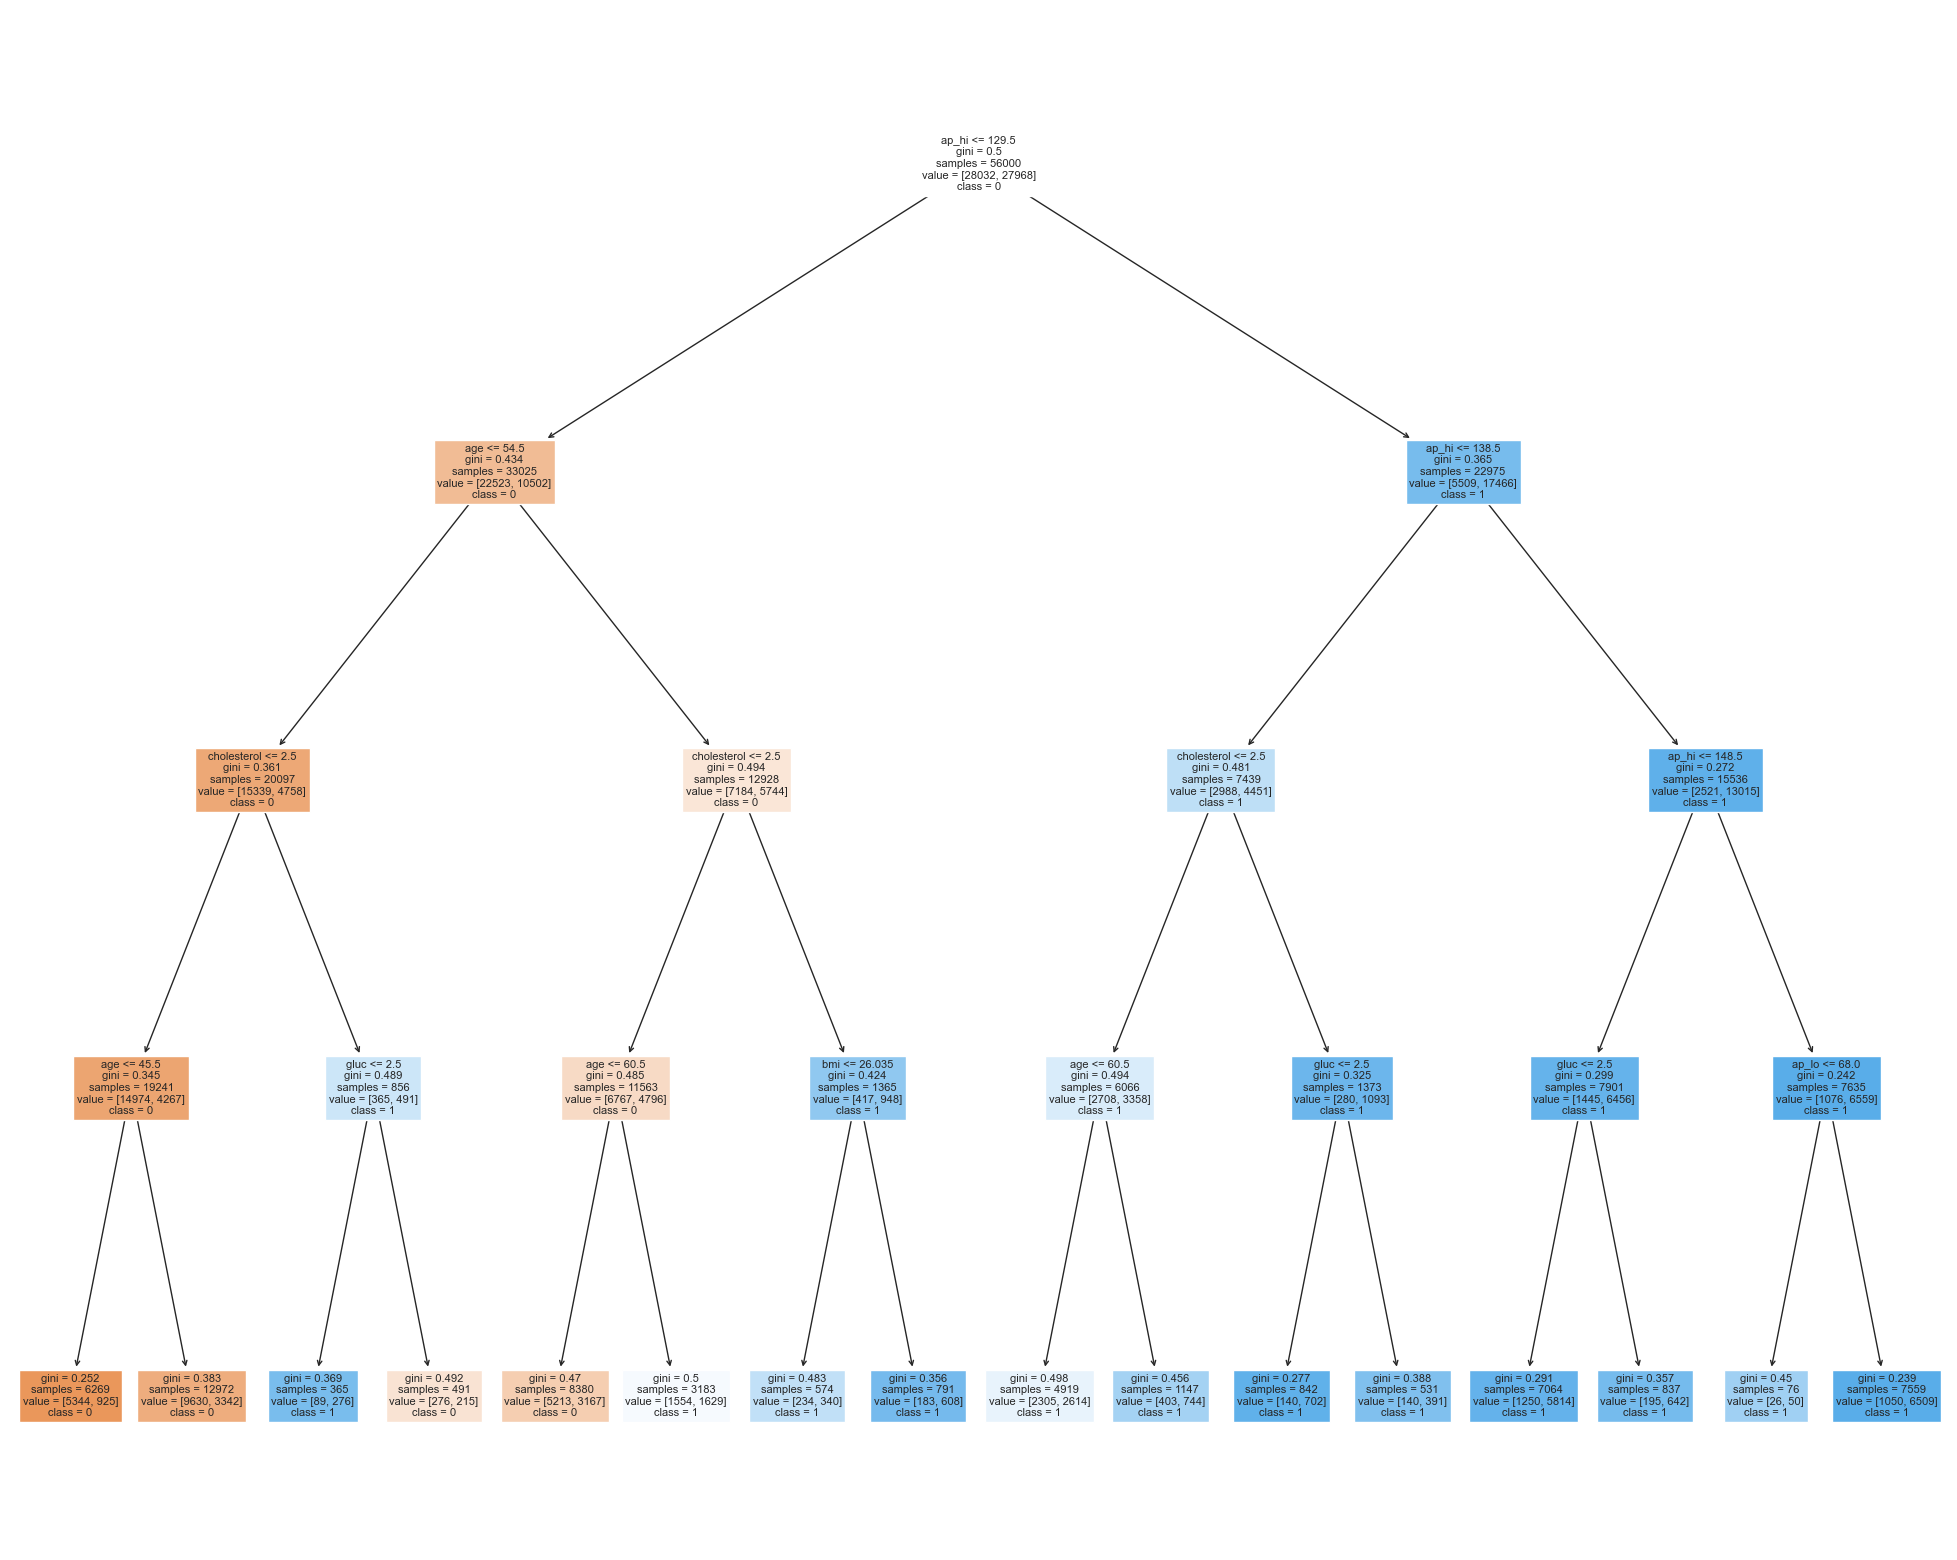

In [40]:
plot_tree(best_tree,x_train,y_train)